# Transition

In [ ]:
import pandas as pd

df = pd.read_csv("./movement_results.csv")
df.head()

,Duration_s,Sample,Final_X,Final_Y,Final_Z
0,2.5,1,0.049221,0.000057,-0.000864
1,2.5,2,0.049902,0.000014,-0.000865
2,2.5,3,0.050669,0.000044,-0.000865
3,2.5,4,0.049924,0.000013,-0.000865
4,2.5,5,0.049985,0.000014,-0.000865


In [ ]:
df.tail()

,Duration_s,Sample,Final_X,Final_Y,Final_Z
145,7.5,46,0.149912,0.000083,-0.000865
146,7.5,47,0.149890,0.000085,-0.000865
147,7.5,48,0.149952,0.000091,-0.000865
148,7.5,49,0.150129,0.000094,-0.000865
149,7.5,50,0.150174,0.000075,-0.000865


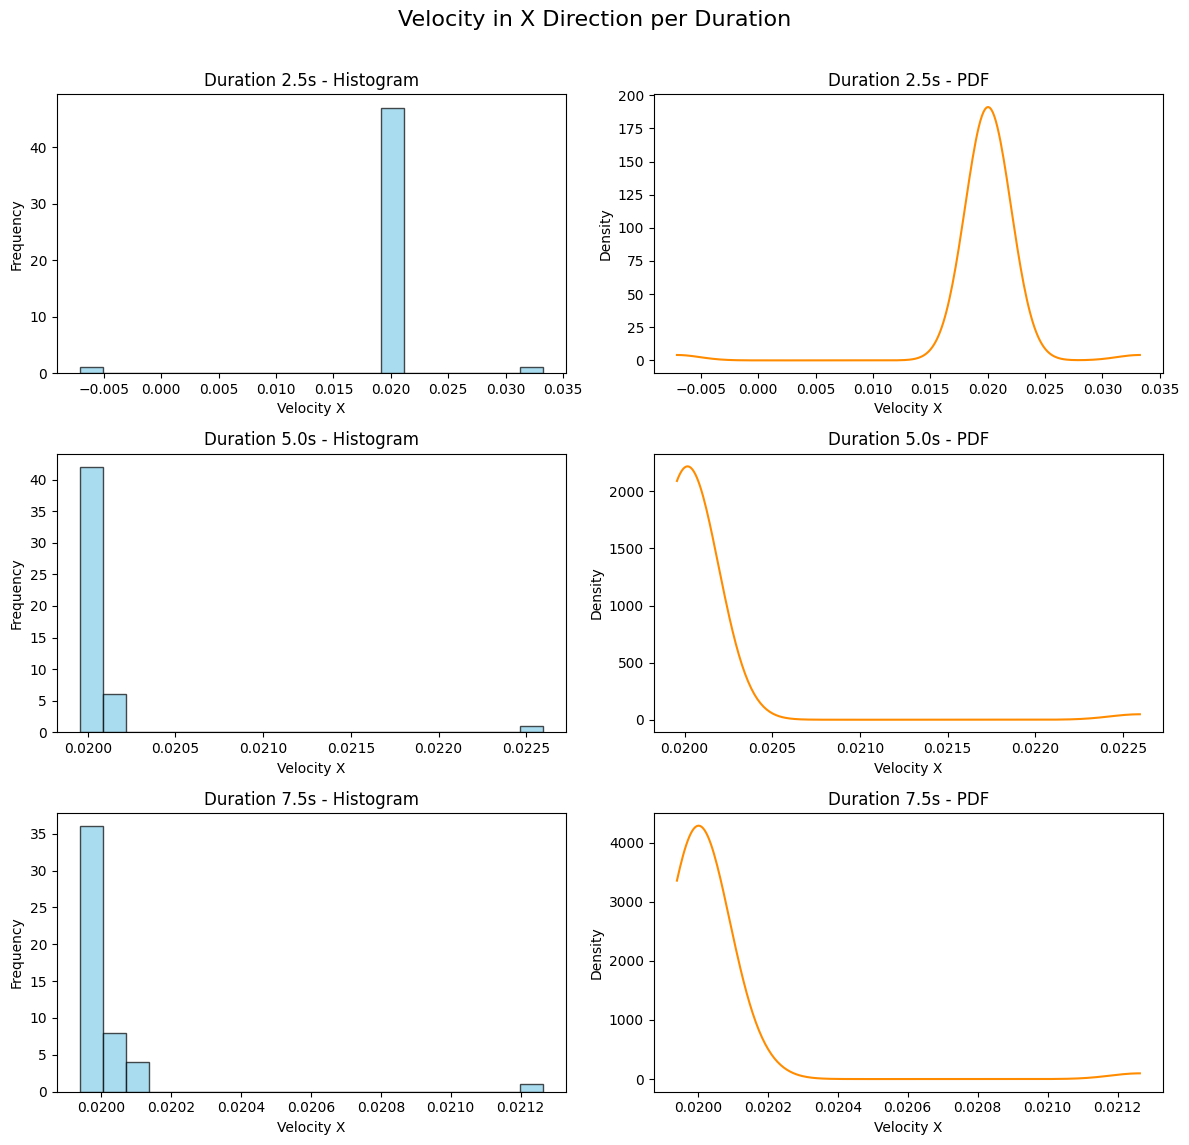


Velocity X Statistics per Duration:
Duration            Median        Variance
2.5           1.999407e-02    1.890711e-05
5.0           2.000380e-02    1.374928e-07
7.5           1.999878e-02    3.364343e-08


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

df['Velocity_X'] = df['Final_X'] / df['Duration_s']

durations = sorted(df['Duration_s'].unique())
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Velocity in X Direction per Duration', fontsize=16)

stats = []

for i, duration in enumerate(durations):
    subset = df[df['Duration_s'] == duration]['Velocity_X']

    ax_hist = axes[i, 0]
    ax_hist.hist(subset, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    ax_hist.set_title(f'Duration {duration}s - Histogram')
    ax_hist.set_xlabel('Velocity X')
    ax_hist.set_ylabel('Frequency')

    ax_pdf = axes[i, 1]
    kde = gaussian_kde(subset)
    x_vals = np.linspace(subset.min(), subset.max(), 300)
    ax_pdf.plot(x_vals, kde(x_vals), color='darkorange')
    ax_pdf.set_title(f'Duration {duration}s - PDF')
    ax_pdf.set_xlabel('Velocity X')
    ax_pdf.set_ylabel('Density')

    median = np.median(subset)
    variance = np.var(subset, ddof=1)
    stats.append((duration, median, variance))

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

print("\nVelocity X Statistics per Duration:")
print("{:<10} {:>15} {:>15}".format("Duration", "Median", "Variance"))
for duration, median, variance in stats:
    print("{:<10} {:>15.6e} {:>15.6e}".format(duration, median, variance))


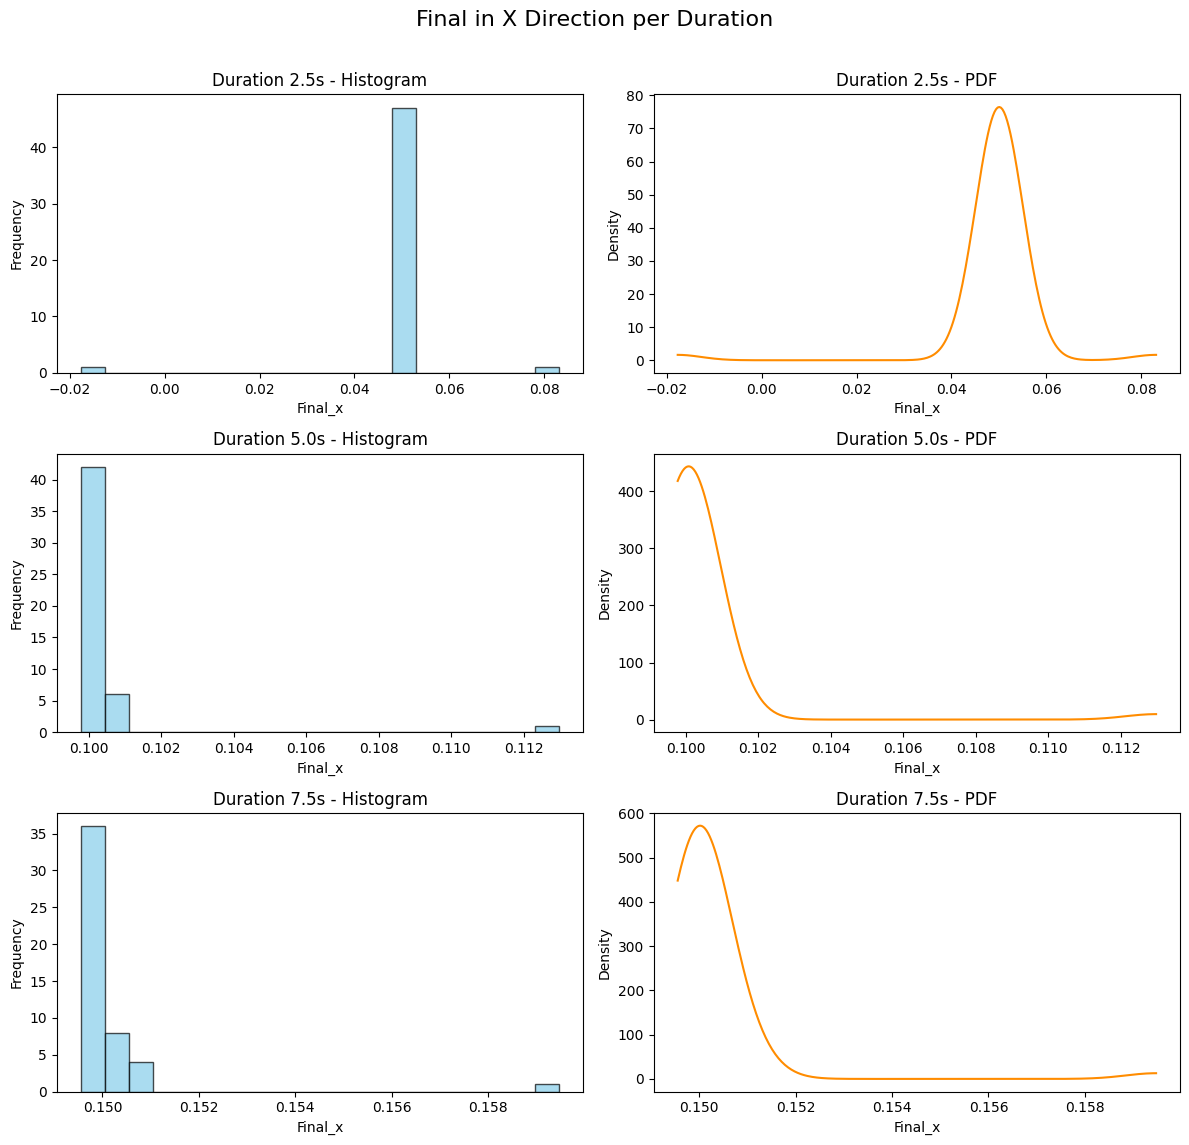


Final_x Statistics per Duration:
Duration            Median        Variance
2.5           4.998518e-02    1.181695e-04
5.0           1.000190e-01    3.437321e-06
7.5           1.499908e-01    1.892443e-06


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

durations = sorted(df['Duration_s'].unique())
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Final in X Direction per Duration', fontsize=16)

stats = []

for i, duration in enumerate(durations):
    subset = df[df['Duration_s'] == duration]['Final_X']

    ax_hist = axes[i, 0]
    ax_hist.hist(subset, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    ax_hist.set_title(f'Duration {duration}s - Histogram')
    ax_hist.set_xlabel('Final_x')
    ax_hist.set_ylabel('Frequency')

    ax_pdf = axes[i, 1]
    kde = gaussian_kde(subset)
    x_vals = np.linspace(subset.min(), subset.max(), 300)
    ax_pdf.plot(x_vals, kde(x_vals), color='darkorange')
    ax_pdf.set_title(f'Duration {duration}s - PDF')
    ax_pdf.set_xlabel('Final_x')
    ax_pdf.set_ylabel('Density')

    median = np.median(subset)
    variance = np.var(subset, ddof=1)
    stats.append((duration, median, variance))

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

print("\nFinal_x Statistics per Duration:")
print("{:<10} {:>15} {:>15}".format("Duration", "Median", "Variance"))
for duration, median, variance in stats:
    print("{:<10} {:>15.6e} {:>15.6e}".format(duration, median, variance))
